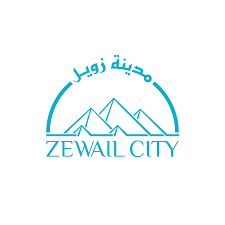
<h1 align="center">University of Science and Technology
</h1>

<h1 align="center">Biomedical Sciences_ Computational Biology and Genomics_
BMS 474
</h1>
<h1 align="center">FALL 2023	</h1>
<h1 align="center">Assignment 1_Guide</h1>


# How do Machines Store Images?




We have an image of the number 8. Look really closely at the image – you’ll notice that it is made up of small square boxes. These are called pixels.
Machines store images in the form of a matrix of numbers.
These numbers, or the pixel values, denote the intensity or brightness of the pixel. Smaller numbers (closer to zero) represent black, and larger numbers (closer to 255) denote white

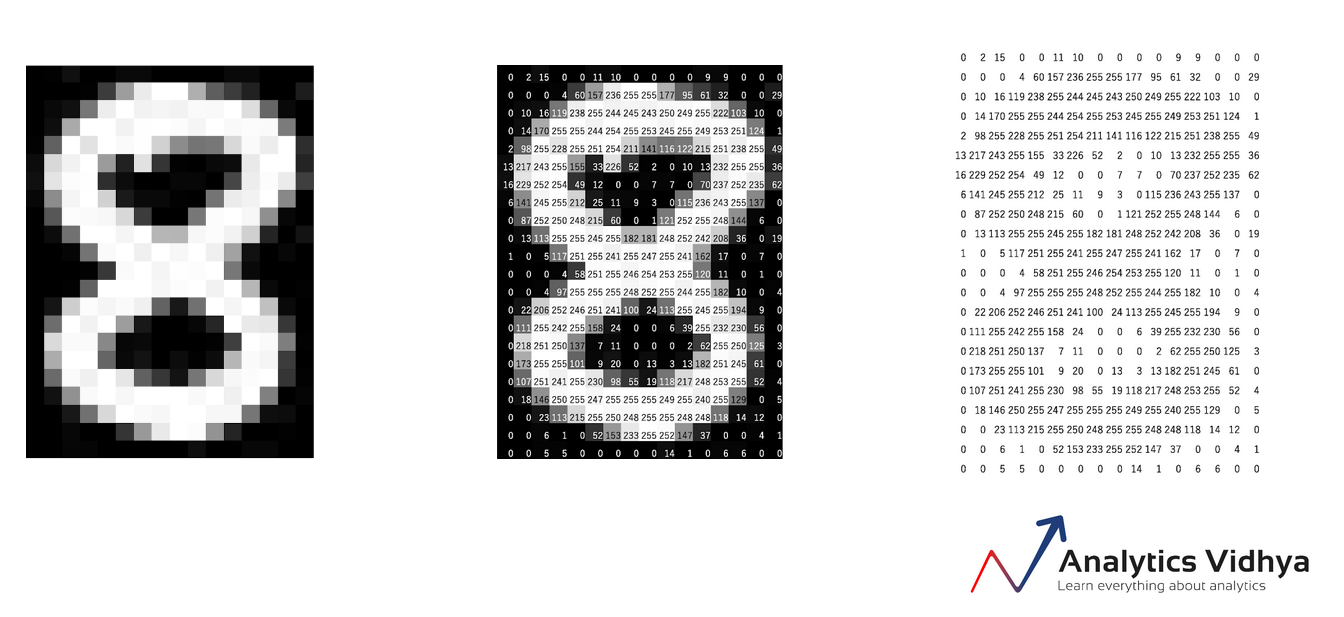

A colored image is typically composed of multiple colors and almost all colors can be generated from three primary colors – red, green and blue.

Hence, in the case of a colored image, there are three Matrices (or channels) – Red, Green, and Blue. Each matrix has values between 0-255 representing the intensity of the color for that pixel. Consider the below image to understand this concept

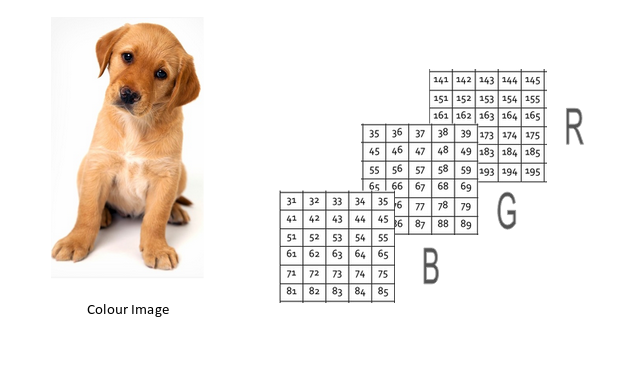

# Prerequisites


In [1]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


# Reading Image Data in Python


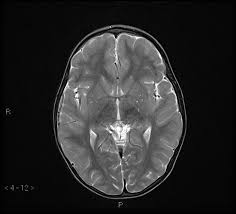

In [4]:
img = cv2.imread("brain2.jpg",cv2.IMREAD_GRAYSCALE)

#cv2.imshow() is disabled in Colab, because it causes Jupyter sessions to crash; As a substitution, consider using  cv2_imshow from google.colab.patches

cv2_imshow(img)

# Image Moments



Image Moment is a particular weighted average of image pixel intensities, with the help of which we can find some specific properties of an image, like radius, area, centroid etc.

In [ ]:
# Calculate Moments


## Findling the Centroid

### What is the centroid of a shape?

The centroid of a shape is the arithmetic mean (i.e. the average) of all the points in a shape. Suppose a shape consists of n distinct points x_1,...,x_n, then the centroid is given by


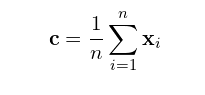

In the context of image processing and computer vision, each shape is made of pixels, and the centroid is simply the weighted average of all the pixels constituting the shape.

The centroid is given by the formula:-


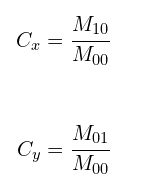

## Steps for finding Centroid of a Blob in OpenCV



To find the center of the blob, we will perform the following steps:-

1. Convert the Image to grayscale.

2. Calculate moments of the grayscale image.

3. Find the center of the image.

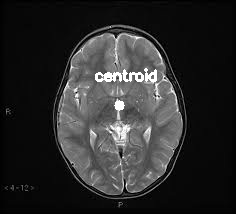

In [ ]:
# convert image to grayscale image

# calculate moments of the grayscale image

# calculate x,y coordinate of center


#Exact Step-by-Step Guide for Assignment Implementation
The previous guide demonstrated how to calculate the centroid of an entire image. However, in our current assignment, we are tasked with a more detailed process. We need to divide the image into blocks, the number of which is determined by the user. For each of these blocks, we are required to calculate the centroid, separately for the X and Y coordinates. This results in two centroid values for each block: Cx (centroid along the X-axis) and Cy (centroid along the Y-axis). So, if, for example, we have two blocks, there will be a total of four centroid values for a single image (2 blocks * 2 centroid values per block = 4 values).

**let's break down the steps concisely:**

- **Image Block Slicing**:  We need to divide the image into blocks, the number of which is determined by the user.

- **Centroid Calculation**: For each of these blocks, we are required to calculate the centroid, separately for the X and Y coordinates. This results in two centroid values for each block: Cx (centroid along the X-axis) and Cy (centroid along the Y-axis). So, if, for example, we have two blocks, there will be a total of four centroid values for a single image (2 blocks * 2 centroid values per block = 4 values).

- **Histogram Plotting**: The next step is to visualize these centroid values by plotting them into a histogram. This histogram will allow us to see the distribution of centroid values for a given image.

- **Comparison**: Compare histograms of images from the same class and different classes to observe differences or similarities in the centroid value distribution.

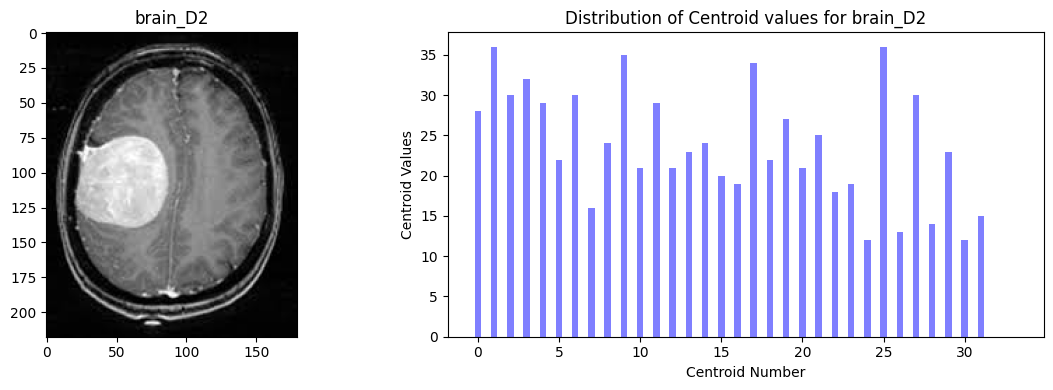

In [69]:
import numpy as np
import cv2
from PIL import Image
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

def slice_image_into_blocks(image, num_blocks): # A function to slice the image into blocks, defined by the user
    if num_blocks == 0:
      print("You cannot enter 0 for the number of blocks.")
      return

    img = Image.open(image).convert('L') # open image and convert it into grey scale
    width, height = img.size # Extract width and height of image
    block_width = width // num_blocks # Finding block width
    block_height = height // num_blocks # Finding block height
    centroid_values = [] # An array to save centroid values
    blocks = []
    for i in range(num_blocks):
        for j in range(num_blocks):
            # Crop the image into blocks
            block = img.crop((i * block_width, j * block_height, (i + 1) * block_width, (j + 1) * block_height))
            # crop function allows us to make rectangular blocks of equal sizes. It takes 4 inputs, left, upper, right, and lower.
            # These are coordinates that define a bounding box.
            # For example, if the num_blocks = 2, in the first loop the coordinates of cropping will be (0, 0, block_width, block_height)
            # In the second loop, they will be (0, block_height, block_width, 2 block_height)
            # Third, (block_width, 0, 2 block_width, block_height)
            # Fourth, (block_width, block_height, 2 block_width, 2 block_height)
            block_array = np.array(block) # Convert the block to a numpy array with pixel values
            blocks.append(block_array) # add the block to an array of blocks which we'll use later

    return blocks # return the blocks array


def calculate_centroids(image, num_blocks):

    blocks = slice_image_into_blocks(image, num_blocks) # retrieve the number of blocks from the image above
    centroids = [] # list of centroids
    if num_blocks == 0:
      print("You cannot enter 0 for the number of blocks.")
      return
    for block in blocks: # looping over each block
        moments = cv2.moments(block, binaryImage=False) # moments object calculated by cv2 package
        if moments['m00'] != 0:
          Cx = int(moments['m10'] / moments['m00']) # calculate the x-component of the centroid
          Cy = int(moments['m01'] / moments['m00']) # calculate the y-component of the centroid
          centroids.append((Cx, Cy))
    else:
        # Handle the case where the area is zero (empty block)
        centroids.append((0, 0))
    return centroids # return the centroids list

def plot_centroids(image, num_blocks):
  if num_blocks == 0:
      print("You cannot enter 0 for the number of blocks.")
      return
  centroid_values = calculate_centroids(image, num_blocks) # centroid values
  img = np.array(Image.open(image).convert('L')) # converting the image to a numpy array to use it later

# Create a single figure with two subplots (one for the image itself and one for the bar plot)
  fig, axes = plt.subplots(1, 2, figsize=(12, 4))

  # Plot the image
  title = str(image).strip(".jpg")
  axes[0].imshow(img, cmap='gray')
  axes[0].set_title(title)

  # Plot the bar plot for centroid values
  title_histo = "Distribution of Centroid values for " + str(image).strip(".jpg")
  num_of_centroids = len(centroid_values) * 2 # this is the number of centroids (twice the number of blocks)
  centroid_indices = range(num_of_centroids) # from 0 to num_of_centroids
  centroid_vals = [val for centroid in centroid_values for val in centroid] # all centroid values, Cxs and Cys
  axes[1].bar(centroid_indices, centroid_vals, color='blue', alpha=0.5, width=0.4) # Plotting the bar diagram
  axes[1].set_title(title_histo)
  axes[1].set_xlabel('Centroid Number')
  axes[1].set_ylabel('Centroid Values')

  plt.tight_layout()
  plt.show()

plot_centroids("brain_D2.jpg", 4)

**Discussion Questions**

a. What is the effect of having a small number of blocks on
images from the same class?

Ans: We capture more global trends of the image, so we are representing large-scale patterns and missing finer details. Images within the same class may exhibit differences, but they are not really captured with a small number of blocks. Therefore, they look more similar.

b. What is the effect of having a large number of blocks on
images from the same class?

Ans: We capture finer details and features of the images. Images now show more variations and distinct characteristics. However, there might be overfitting since this high level of detail may only represent individual samples but not the entire class.

c. What is the effect of having a small number of blocks on
images from different classes?

Ans: Because we are using small number of blocks, we are not extracting many features, and therefore images from different classes might actually be very similar and so the model will not be able to distinguish. They will only differ if the images are REALLY different, but if they exhibit similar profiles or contours, they might appear very similar.

d. What is the effect of having a large number of blocks on images from different classes?

Ans: Again, the more blocks, the better we capture the details. Therefore, the model will be better able to distinguish the finer details of the different classes of images. However, there is again the risk of overfitting, since the features might be highly specific to inidividual samples.

e. Plot the centroid feature to head2 and head3 images. Discuss the output.

Ans: For an input of 4, head2 centroid values range from about 10 to approximately 45, and the data overall show a slight skewness to the right. For head3, centroid values range from about 17 to just above 30, and the data overall seem uniform.

f. Plot the centroid feature to brain_D1 and brain_D2 images. Discuss the output. Does the tumor position affect the resulted feature?

Ans: For an input of 4, brain_D1 centroid values range from about 20 to about 100, showing a very small  skewness to the right, with three sharp rises at centroid values of 100. Meanwhile, brain_D2 centroid values range from about 10 to about 35, showing a very small skewness to the right, with three sharp rises at centroid values o 35. Overall, yes, the tumor position affect the resulting feature because although having a similar behavior, their ranges and peaks are completely different.

 # 8-Direction Chain Code Feature Vector.

In [ ]:
# Find contours in the binary image
# Function to encode chain codes from the longest contour
# Saving chain code of each image to the dictionary
# Constructing feature vector for chain code
# Plotting

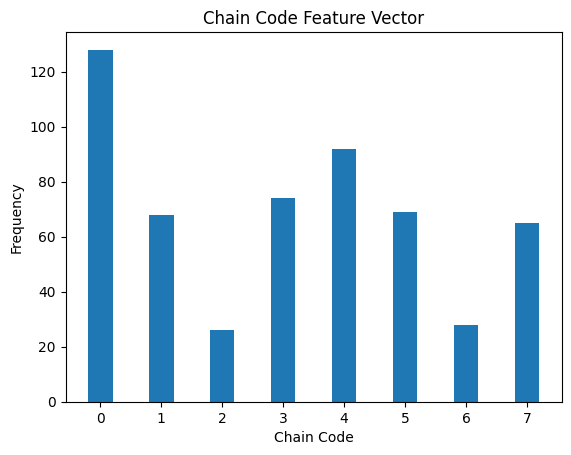

In [91]:
# Loading and preprocessing of the image
def findContours(image):
  img = cv2.imread(image, cv2.IMREAD_GRAYSCALE) # Reading the image
  _, binary_image = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY) # Converting the image from grayscale to binary

  contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # Detecting contours of the object in the binary image

  longestContour = max(contours, key=len)
  return longestContour

def find_chain_codes(image, n_chains):

    contour = findContours(image)
    chain_codes = []
    for i in range(1, len(contour)):
        point1 = contour[i-1][0]  # Get the first point
        point2 = contour[i][0]    # Get the second point

        dx = round(float(point2[0]) - float(point1[0]))  # Find change in x direction
        dy = round(float(point2[1]) - float(point1[1]))  # Find change in y direction

        # Calculate the angle (direction) based on (dx, dy)
        angle = np.arctan2(dy, dx)  # Get the angle in radians

        angle_degrees = np.degrees(angle) # Convert the angle from radians to degrees
        direction = round(angle_degrees / (360/n_chains)) % n_chains # Mapping the angle to one of the eight directions. For example, an angle from 0 to 45 would be mapped to 0, from 45 to 90 to 1, and so on...
        # The modulus is made to guarantee that the range is always from 0 to 7, just in case an angle is bigger than 360...
        chain_codes.append(int(direction))

    return chain_codes

def construct_feature_vector(chain_codes, n_chains):
    return [chain_codes.count(i) for i in range(n_chains)] # To determine the count (frequency) of each number in the range 0 to 7

def ImageChainCodes(list_of_images, n_chains):
  chain_codes_dict = {}
  for image_path in list_of_images:
    chain_codes = find_chain_codes(image_path, n_chains) # chain code of image
    chain_codes_dict[image_path] = construct_feature_vector(chain_codes) # saving the chain codes of that image to the dictionary
  return chain_codes_dict

list_of_images = ['brain1.jpg', 'brain2.jpg', 'brain3.jpg', 'brain_D1.jpg', 'brain_D2.jpg', 'head1.jpg', 'head2.jpg', 'head3.jpg', 'liver1.jpg', 'liver2.jpg', 'liver3.jpg', 'lung1.jpg', 'lung2.jpg', 'lung3.jpg']

def plot(image, n_chains):
  chain_codes =  find_chain_codes(image, n_chains)
  feature_vector = construct_feature_vector(chain_codes, n_chains)
  plt.bar(range(n_chains), feature_vector, width=0.4)
  plt.xlabel('Chain Code')
  plt.ylabel('Frequency')
  plt.title('Chain Code Feature Vector')
  plt.show()

plot('lung1.jpg', 8)
#ImageChainCodes(list_of_images, True)

#construct_feature_vector(find_chain_codes('brain1.jpg', 8), 8)

**Discussion Questions**

1. Provide plots for images from the same class. Comment on the results.

Ans: They are generally similar, though they exhibit small variations. Because the images have similar global features, the distributions usually follow a similar trend. If there is a very distinguishing feature for the images, they will have similar peaks. However, they might have different peaks due to minor variations in image quality. For some classes, such as the liver or lung, the distributions may vary from image to image. But generally speaking, they should be similar if the images are in the same location with the same quality, etc.

2. Provide plots for images from different classes. Comment on the results.

Ans: They are highly different because different image classes (such as brain vs. liver) have different global structures and contours, which reflects in their 8-direction chain code feature vector. They have different peaks as well as varying overall global trends.